In [54]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
tsla_df = yf.download('TSLA', 
                      start='2018-01-01', 
                      end='2020-09-23', 
                      progress=False)
tsla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000
2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500
2018-01-04,62.574001,63.709999,61.136002,62.924000,62.924000,49731500
2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000
2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000


In [57]:
tsla_df['Price Change'] = ((tsla_df['Open'] - tsla_df['Close'])/tsla_df['Open'])
#tsla_df['Mid'] = (tsla_df['High'] + tsla_df['Low'])/2
tsla_df['MA10'] = tsla_df['Adj Close'].rolling(10).mean()
tsla_df['MA50'] = tsla_df['Adj Close'].rolling(50).mean()
#tsla_df['MA200'] = tsla_df['Adj Close'].rolling(200).mean()

tsla_df.head(20)

,Open,High,Low,Close,Adj Close,Volume,Price Change,MA10,MA50
Date,,,,,,,,,
2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000,-0.027340,NaN,NaN
2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500,0.011682,NaN,NaN
2018-01-04,62.574001,63.709999,61.136002,62.924000,62.924000,49731500,-0.005593,NaN,NaN
2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000,0.000126,NaN,NaN
2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000,-0.064589,NaN,NaN
2018-01-09,67.031998,67.760002,65.480003,66.737999,66.737999,35733000,0.004386,NaN,NaN
2018-01-10,66.440002,67.400002,66.000000,66.959999,66.959999,21549500,-0.007827,NaN,NaN
2018-01-11,67.047997,68.961998,66.652000,67.589996,67.589996,33227500,-0.008084,NaN,NaN
2018-01-12,67.725998,68.082001,66.734001,67.244003,67.244003,24125500,0.007117,NaN,NaN


In [83]:
tsla_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Price Change,MA10,MA50
count,686.000000,686.000000,686.000000,686.000000,686.000000,6.860000e+02,686.000000,677.000000,637.000000
mean,98.766691,101.402300,96.070665,98.942417,98.942417,5.355022e+07,-0.001707,96.957326,88.932189
std,86.176461,89.376654,82.610042,86.476231,86.476231,3.366753e+07,0.031671,82.009714,63.796979
min,36.220001,37.335999,35.397999,35.793999,35.793999,1.085270e+07,-0.157802,37.999001,43.862840
25%,55.529000,56.326499,54.690498,55.329500,55.329500,3.034662e+07,-0.016690,56.188400,57.795760
50%,64.423000,65.617001,63.237000,64.648003,64.648003,4.203250e+07,-0.000972,65.226200,63.003520
75%,95.279999,98.943499,92.902502,95.175497,95.175497,6.822388e+07,0.014735,95.271601,92.378880
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08,0.107572,437.463199,360.923679


In [76]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

In [77]:
tsla_df['Volume'] = mm_scaler.fit_transform(tsla_df['Volume'])

ValueError: Expected 2D array, got 1D array instead:
array=[2.176100e+07 2.260750e+07 4.973150e+07 2.295600e+07 4.929700e+07
 3.573300e+07 2.154950e+07 3.322750e+07 2.412550e+07 3.237150e+07
 3.551750e+07 2.842900e+07 2.444150e+07 3.105200e+07 2.732700e+07
 2.643750e+07 3.370150e+07 2.269700e+07 2.373550e+07 2.358850e+07
 3.107050e+07 2.098850e+07 1.852400e+07 2.232050e+07 2.544200e+07
 3.484600e+07 5.157300e+07 6.466850e+07 3.113900e+07 2.280100e+07
 1.975350e+07 2.956450e+07 2.821300e+07 2.004700e+07 1.609800e+07
 3.484900e+07 2.908700e+07 2.170000e+07 2.398700e+07 3.034850e+07
 3.442800e+07 2.546400e+07 1.911900e+07 2.142850e+07 2.503650e+07
 1.783100e+07 2.753400e+07 4.132000e+07 2.982900e+07 3.983700e+07
 3.282400e+07 3.058650e+07 3.742150e+07 2.382150e+07 2.979200e+07
 2.469900e+07 3.327450e+07 4.187600e+07 6.936000e+07 1.050070e+08
 7.585350e+07 8.057000e+07 9.422200e+07 9.948350e+07 9.560550e+07
 6.760150e+07 5.124900e+07 5.494900e+07 3.741450e+07 3.804400e+07
 3.663600e+07 3.169250e+07 3.500000e+07 3.278850e+07 3.045300e+07
 2.813950e+07 2.446700e+07 2.842650e+07 2.006800e+07 2.178000e+07
 2.182300e+07 2.114100e+07 2.312800e+07 4.485200e+07 8.676050e+07
 4.284700e+07 4.339100e+07 2.965000e+07 2.863700e+07 2.825800e+07
 2.339800e+07 3.643400e+07 4.759600e+07 2.837000e+07 2.210300e+07
 3.625950e+07 4.591300e+07 4.472900e+07 2.992550e+07 2.088350e+07
 1.937550e+07 2.833300e+07 3.744850e+07 2.959850e+07 2.712200e+07
 2.398900e+07 2.997600e+07 9.383650e+07 7.172650e+07 4.102600e+07
 6.591750e+07 1.117370e+08 4.734900e+07 5.490500e+07 5.424150e+07
 6.036600e+07 6.380950e+07 4.191850e+07 3.983550e+07 5.133050e+07
 3.465650e+07 3.726250e+07 4.166850e+07 4.199000e+07 3.246200e+07
 9.379900e+07 6.141300e+07 8.738200e+07 4.432750e+07 3.798400e+07
 4.735750e+07 2.442050e+07 2.860600e+07 2.934900e+07 3.909350e+07
 3.498100e+07 2.812100e+07 2.957650e+07 2.581100e+07 5.496450e+07
 4.795400e+07 3.537700e+07 2.315250e+07 2.851650e+07 3.407050e+07
 2.538450e+07 5.064700e+07 1.160750e+08 6.828250e+07 4.282150e+07
 1.543790e+08 1.228560e+08 8.591900e+07 5.776000e+07 5.231950e+07
 3.493200e+07 4.550650e+07 3.032000e+07 9.479300e+07 8.701150e+07
 6.586100e+07 2.973000e+07 2.573650e+07 1.801300e+07 6.539650e+07
 3.824550e+07 3.723700e+07 3.608350e+07 2.687550e+07 4.175250e+07
 3.860400e+07 3.740400e+07 1.124595e+08 7.141750e+07 4.585000e+07
 5.007700e+07 3.170150e+07 3.382800e+07 3.443800e+07 8.273750e+07
 4.147450e+07 3.674700e+07 2.525250e+07 2.421500e+07 2.240850e+07
 3.921600e+07 4.254550e+07 1.682485e+08 1.088880e+08 5.871750e+07
 3.997500e+07 4.907100e+07 8.972250e+07 6.736350e+07 6.030300e+07
 6.407650e+07 4.083850e+07 3.600700e+07 3.100000e+07 4.763200e+07
 4.327750e+07 2.710600e+07 4.687750e+07 2.800150e+07 9.513900e+07
 1.002915e+08 1.042035e+08 1.371275e+08 7.243000e+07 4.563350e+07
 3.812150e+07 4.000050e+07 3.904000e+07 3.915500e+07 3.381450e+07
 3.687250e+07 3.545350e+07 2.549400e+07 3.470750e+07 2.724300e+07
 2.520150e+07 2.312850e+07 3.603100e+07 4.854450e+07 4.002350e+07
 2.343400e+07 2.101300e+07 3.996050e+07 3.179150e+07 2.063800e+07
 1.540350e+07 2.814550e+07 4.153250e+07 4.230950e+07 3.921250e+07
 5.755600e+07 3.306750e+07 3.154400e+07 2.513500e+07 3.682950e+07
 3.168800e+07 3.837000e+07 3.550000e+07 4.137100e+07 4.535950e+07
 4.008400e+07 2.779950e+07 4.081550e+07 4.287550e+07 4.969500e+07
 3.151150e+07 5.829300e+07 3.482600e+07 3.697050e+07 3.775600e+07
 3.504250e+07 2.716450e+07 3.028200e+07 2.519550e+07 2.623650e+07
 3.028300e+07 2.345850e+07 1.838350e+07 1.207540e+08 6.033350e+07
 6.265000e+07 4.006100e+07 3.624800e+07 3.211650e+07 2.310850e+07
 5.625150e+07 6.284600e+07 3.641700e+07 3.676050e+07 3.371400e+07
 2.519250e+07 3.260300e+07 2.922100e+07 3.564850e+07 2.758800e+07
 2.570800e+07 2.600400e+07 1.952450e+07 2.084200e+07 3.571050e+07
 4.454600e+07 2.870300e+07 3.313250e+07 4.291250e+07 5.591950e+07
 5.260350e+07 1.145570e+08 8.548400e+07 9.382350e+07 5.167750e+07
 4.721250e+07 4.409800e+07 3.696150e+07 3.752050e+07 3.422350e+07
 3.551700e+07 7.392750e+07 5.140500e+07 5.900300e+07 3.454100e+07
 2.973550e+07 4.372800e+07 5.107500e+07 3.675450e+07 4.389600e+07
 3.387050e+07 2.995650e+07 4.055200e+07 2.739450e+07 3.959700e+07
 1.186035e+08 6.519150e+07 5.205200e+07 2.952000e+07 3.530650e+07
 4.917950e+07 3.373000e+07 5.019300e+07 3.636450e+07 2.563250e+07
 2.938150e+07 6.073550e+07 5.471950e+07 5.363750e+07 1.092470e+08
 1.118035e+08 8.357250e+07 4.732300e+07 5.352200e+07 9.079650e+07
 1.185340e+08 5.416950e+07 5.065700e+07 3.088200e+07 3.355700e+07
 3.504150e+07 5.417400e+07 3.626200e+07 3.648000e+07 3.741650e+07
 8.893350e+07 1.026310e+08 9.001950e+07 9.342600e+07 1.327355e+08
 7.068300e+07 5.156450e+07 5.984300e+07 3.963250e+07 5.203350e+07
 6.532200e+07 6.903750e+07 6.755400e+07 1.012110e+08 8.001750e+07
 5.292500e+07 5.826750e+07 7.598750e+07 4.084150e+07 3.716700e+07
 6.158400e+07 6.357900e+07 3.287550e+07 5.931750e+07 4.101050e+07
 2.875400e+07 3.091050e+07 4.253600e+07 3.169850e+07 3.425700e+07
 4.106700e+07 4.629500e+07 7.100550e+07 3.532850e+07 2.940250e+07
 3.095400e+07 4.572850e+07 3.757200e+07 4.600250e+07 5.500050e+07
 4.074500e+07 4.882350e+07 2.379300e+07 3.524200e+07 3.421200e+07
 2.511550e+07 5.536400e+07 1.120915e+08 5.013850e+07 4.636650e+07
 4.054500e+07 4.589100e+07 4.129750e+07 3.068250e+07 3.514150e+07
 2.782100e+07 2.388250e+07 2.637150e+07 1.949100e+07 2.331950e+07
 2.424050e+07 4.781300e+07 4.079800e+07 2.549250e+07 2.654800e+07
 2.062600e+07 3.897150e+07 3.279500e+07 4.269300e+07 2.525950e+07
 2.708100e+07 1.612750e+07 2.589750e+07 4.660300e+07 2.677050e+07
 2.880500e+07 3.697650e+07 2.094700e+07 2.401350e+07 2.441850e+07
 5.021400e+07 4.290600e+07 2.656550e+07 2.364050e+07 1.932700e+07
 2.085100e+07 2.397900e+07 3.176500e+07 2.170100e+07 6.445750e+07
 4.713550e+07 5.942250e+07 5.558200e+07 2.939900e+07 3.081300e+07
 2.815700e+07 7.542250e+07 3.997500e+07 4.032100e+07 4.339100e+07
 3.447200e+07 3.141650e+07 4.237700e+07 5.102500e+07 3.216400e+07
 3.342050e+07 2.384650e+07 2.874900e+07 2.510150e+07 2.300400e+07
 2.630550e+07 1.486045e+08 1.500305e+08 9.435150e+07 6.342150e+07
 4.820900e+07 2.533500e+07 3.191950e+07 4.393500e+07 3.471700e+07
 3.970450e+07 7.233650e+07 3.034600e+07 4.993350e+07 3.679700e+07
 4.210050e+07 3.232450e+07 2.404500e+07 2.200200e+07 3.862400e+07
 3.362550e+07 3.055000e+07 8.435300e+07 6.169750e+07 3.973700e+07
 2.777800e+07 1.232800e+07 3.037250e+07 3.286850e+07 2.766500e+07
 1.862300e+07 3.806200e+07 4.511550e+07 4.414150e+07 3.448900e+07
 3.881950e+07 3.285450e+07 9.087100e+07 4.248400e+07 7.060500e+07
 9.053550e+07 7.376350e+07 6.659800e+07 4.027350e+07 5.316950e+07
 4.972850e+07 6.293200e+07 5.142850e+07 4.766050e+07 8.889250e+07
 5.066500e+07 8.941050e+07 1.557215e+08 1.422020e+08 6.479750e+07
 1.325880e+08 1.449810e+08 8.684400e+07 1.086835e+08 6.814550e+07
 8.901750e+07 1.568450e+08 9.825500e+07 7.176800e+07 6.804050e+07
 5.894250e+07 8.900750e+07 1.450285e+08 7.859650e+07 2.361675e+08
 3.046940e+08 2.421190e+08 1.994040e+08 8.531750e+07 1.234460e+08
 5.848750e+07 6.011250e+07 1.314465e+08 7.846850e+07 8.190850e+07
 1.271150e+08 8.817450e+07 7.157400e+07 7.596100e+07 8.645250e+07
 7.042750e+07 1.213860e+08 2.456420e+07 2.019500e+07 2.578400e+07
 1.504900e+07 1.085270e+07 1.266290e+07 1.707370e+07 1.559440e+07
 1.332250e+07 1.890910e+07 2.264030e+07 2.048950e+07 2.399460e+07
 2.378620e+07 3.019550e+07 2.828550e+07 1.645450e+07 2.271850e+07
 1.061135e+08 8.690350e+07 7.188700e+07 5.999050e+07 8.885750e+07
 6.676600e+07 9.929200e+07 1.128105e+08 7.450900e+07 8.959900e+07
 6.328000e+07 6.825000e+07 1.123770e+08 1.528825e+08 1.178850e+08
 1.032895e+08 6.564100e+07 7.373300e+07 1.010455e+08 7.112400e+07
 6.618350e+07 6.618800e+07 1.034070e+08 7.611000e+07 8.108000e+07
 1.423595e+08 1.626590e+08 9.618550e+07 8.495850e+07 5.561600e+07
 5.763850e+07 8.065050e+07 8.259800e+07 7.953450e+07 9.532750e+07
 6.841100e+07 5.259200e+07 5.849050e+07 4.818250e+07 3.654650e+07
 6.127300e+07 4.993750e+07 4.044850e+07 5.774750e+07 3.627800e+07
 5.906250e+07 7.469750e+07 6.782800e+07 3.974750e+07 4.443850e+07
 3.905950e+07 7.087350e+07 5.694100e+07 9.281700e+07 7.958250e+07
 8.381700e+07 7.848600e+07 7.025550e+07 4.945400e+07 4.875950e+07
 4.339850e+07 3.181200e+07 3.182650e+07 5.479800e+07 4.627250e+07
 4.427450e+07 4.513200e+07 8.459250e+07 6.663450e+07 8.625050e+07
 1.028495e+08 1.074485e+08 8.155650e+07 5.858800e+07 1.166880e+08
 1.949270e+08 1.170905e+08 8.183900e+07 7.150400e+07 4.665000e+07
 8.560700e+07 8.078650e+07 7.080550e+07 1.216425e+08 9.698300e+07
 8.024350e+07 7.904350e+07 4.713450e+07 3.810500e+07 6.123500e+07
 4.404650e+07 4.207500e+07 2.489000e+07 2.996150e+07 4.448200e+07
 3.761150e+07 4.312900e+07 1.094940e+08 1.021265e+08 6.288800e+07
 1.012115e+08 8.237250e+07 6.102650e+07 1.030590e+08 1.074480e+08
 1.003180e+08 5.329450e+07 7.119700e+07 1.184650e+08 1.004060e+08
 1.183744e+08 9.011940e+07 9.617610e+07 8.759610e+07 1.103219e+08
 1.154657e+08 7.946580e+07 8.493060e+07 6.071750e+07 8.302060e+07
 9.729820e+07 7.227930e+07 7.677920e+07 8.640680e+07 1.094768e+08
 7.958080e+07].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [74]:
import statistics
gains = []
losses = []

for i in range(len(tsla_df['Price Change'])):
    if tsla_df['Price Change'][i] > 0:
        gains.append(tsla_df['Price Change'][i])
    else:
        losses.append(tsla_df['Price Change'][i])


avg_gains = statistics.mean(gains)
avg_losses = statistics.mean(losses)
print(avg_gains, avg_losses)

0.021618179882021887 -0.02307761846964739


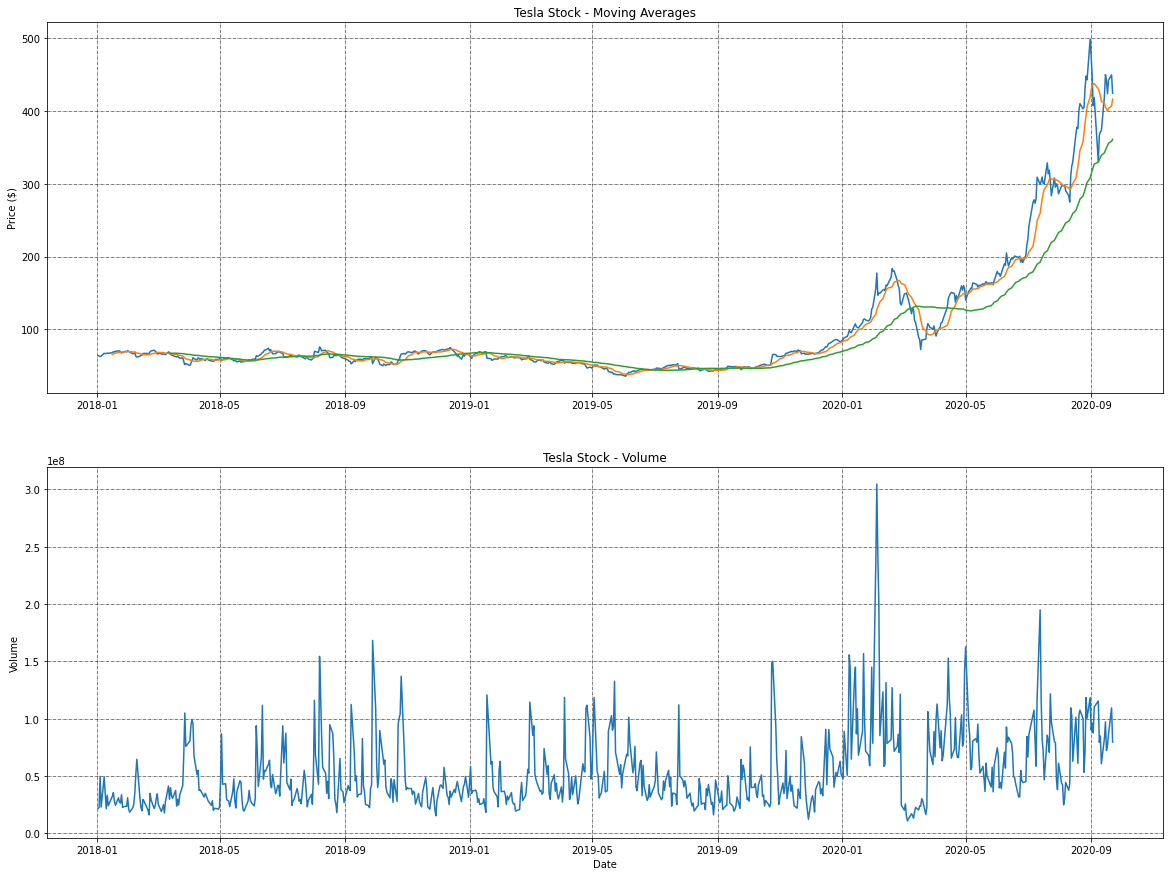

In [73]:
fig = plt.figure(figsize=(20,15))
# The price subplot:
price_ax = plt.subplot(2,1,1)
price_ax.plot(tsla_df.index, tsla_df[['Adj Close', 'MA10', 'MA50']])
price_ax.set_ylabel('Price ($)')
price_ax.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# The ROC subplot shares the date axis with the price plot:
roc_ax = plt.subplot(2,1,2, sharex=price_ax)
roc_ax.plot(tsla_df.index, tsla_df['Volume'])
roc_ax.set_xlabel('Date')
roc_ax.set_ylabel('Volume')
roc_ax.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# We can add titles to each of the subplots:
price_ax.set_title("Tesla Stock - Moving Averages")
roc_ax.set_title("Tesla Stock - Volume")
fig.subplots_adjust(hspace=0.2)


In [42]:
df = tsla_df['Close'].reset_index()
exp1 = df['Date'].ewm(span=12, adjust=False).mean()
exp2 = tsla_df[''].ewm(span=26, adjust=False).mean()
macd = exp1-exp2

In [ ]:
plt.plot(df.ds, macd, label='AMD MACD', color = '#EBD2BE')
plt.plot(df.ds, exp3, label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()

In [22]:
window_size = 100
N = tsla_df.shape[0]

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*tsla_df[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-tsla_df[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

KeyError: 0

In [7]:
#define the ticker symbol
tickerSymbol = 'TSLA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#info on the company
tickerData.info

{'zip': '94304',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 48016,
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, Netherlands, Norway, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers sedans and sport utility vehicles. It also provides electric powertrain components and systems; and services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians, as well as sells used vehicles. This segment markets and sells its products through a network of company-owned stores and galleries, as well as through its own Website. The Energy Generation and Storage segment offers energy storage products, such as rechargeable lithium-ion battery systems for use in homes, industrial, commercial facilities, and utility grids; and desig

In [8]:
#define the ticker symbol
tickerSymbol = 'TSLA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get event data for ticker
tickerData.calendar

,0,1
Earnings Date,2020-10-21 00:00:00,2020-10-26 00:00:00
Earnings Average,0.56,0.56
Earnings Low,0.23,0.23
Earnings High,0.98,0.98
Revenue Average,8174590000,8174590000
Revenue Low,6681000000,6681000000
Revenue High,9677310000,9677310000


In [9]:
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get recommendation data for ticker
tickerData.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2020-07-20 13:50:49,Jefferies,Buy,,main
2020-07-20 14:48:02,Raymond James,Strong Buy,,main
2020-07-23 08:43:04,Piper Sandler,Overweight,,main


## Getting stock info in one step:

In [36]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import re

def stock_data(ticker, start_date, end_date):
    # 1. Request data:
    data = yf.download(ticker, 
                      start=start_date, 
                      end=end_date,
                      interval='30m', 
                      progress=False)

    # 2. Feature Engineering:
    data['Percent Price Change Within Period'] = ((data['Close'] - data['Open'])/data['Open'])*100
    data['Change in Close Price'] = data['Close'] - data['Close'].shift(1)


    #3. Export data:
    f_name = ticker + "_data"
    data.to_csv('~/LighthouseLabs-Final/Stock_Data/' + f_name + ".csv")
    print('Data saved!')

    # 4. Data visualization:
    #fig = plt.figure(figsize=(20,15))
    # The price subplot:
    #price_ax = plt.subplot(2,1,1)
    #price_ax.plot(data.index, data[['Adj Close', 'MA10', 'MA50']])
    #price_ax.set_ylabel('Price ($)')
    #price_ax.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    # The ROC subplot shares the date axis with the price plot:
    #vol_ax = plt.subplot(2,1,2, sharex=price_ax)
    #vol_ax.plot(data.index, data['Volume'])
    #vol_ax.set_xlabel('Date')
    #vol_ax.set_ylabel('Volume')
    #vol_ax.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    # We can add titles to each of the subplots:
    #price_ax.set_title(ticker + " Stock - Moving Averages")
    #vol_ax.set_title(ticker + " Stock - Volume")
    #fig.subplots_adjust(hspace=0.2)
    #plt.show()

In [40]:
stock_data('AAPL', '2020-09-17', '2020-09-26')
stock_data('GOOG', '2020-09-17', '2020-09-26')
stock_data('JNJ', '2020-09-17', '2020-09-26')
stock_data('JPM', '2020-09-17', '2020-09-26')
stock_data('PG', '2020-09-17', '2020-09-26')

Data saved!
Data saved!
Data saved!
Data saved!
Data saved!


In [39]:
stock_data('FB', '2020-09-17', '2020-09-26')
stock_data('AMZN', '2020-09-17', '2020-09-26')
stock_data('NKE', '2020-09-17', '2020-09-26')
stock_data('NFLX', '2020-09-23', '2020-09-26')

Data saved!
Data saved!
Data saved!
Data saved!


Data saved!


Data saved!


Data saved!
